## Stock Sentiment Analysis using News Headlines

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Data.csv', encoding = "ISO-8859-1")

In [3]:
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


In [4]:
df['Date'].unique()

array(['2000-01-03', '2000-01-04', '2000-01-05', ..., '2016-06-29',
       '2016-06-30', '2016-07-01'], dtype=object)

In [5]:
len(df['Date'].unique())

4101

In [8]:
len(df[df['Date'] > '20140101'])

378

In [9]:
train = df[df['Date'] <= '20150101']
test = df[df['Date'] > '20140101']

In [10]:
train.columns

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25'],
      dtype='object')

In [11]:
data = train.drop(['Date', 'Label'], axis=1)
#remove characters other than chars and digits[it will work when it is in english]
data.replace("[^a-zA-Z0-9]"," ",regex=True, inplace=True)

for col in data.columns:
    data[col] = data[col].str.lower()

In [12]:
headlines = [' '.join(ent) for ent in data.astype(str).to_numpy()]
headlines[0]

'a  hindrance to operations   extracts from the leaked reports scorecard hughes  instant hit buoys blues jack gets his skates on at ice cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton s party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar s debut double southgate strikes  leeds pay the penalty hammers hand robson a youthful lesson saints party like it s 1999 wear wolves have turned into lambs stump mike catches testy gough s taunt langer escapes to hit 167 flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl s successor drawn into scandal the difference between men and women sara denver  nurse turned solicitor diana s landmine crusade put tories in a panic yeltsin s resignation caught opposition flat footed russian roulette sold out recovering a title'

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [14]:
## BAG OF WORDS
countvector=CountVectorizer(ngram_range=(2,2))
traindataset=countvector.fit_transform(headlines)
traindataset

<3975x598244 sparse matrix of type '<class 'numpy.int64'>'
	with 1093034 stored elements in Compressed Sparse Row format>

In [66]:
for i in traindataset:
    break
for j in i:
    print(j)

  (0, 245398)	1
  (0, 535245)	1
  (0, 380066)	1
  (0, 183750)	1
  (0, 213096)	1
  (0, 519728)	1
  (0, 304796)	1
  (0, 438837)	1
  (0, 461434)	1
  (0, 253195)	1
  (0, 268324)	1
  (0, 247159)	1
  (0, 90053)	1
  (0, 78868)	1
  (0, 284275)	1
  (0, 221118)	1
  (0, 246540)	1
  (0, 477528)	1
  (0, 374644)	1
  (0, 53402)	1
  (0, 254966)	1
  (0, 119667)	1
  (0, 26262)	1
  (0, 107315)	1
  (0, 49633)	1
  :	:
  (0, 38920)	1
  (0, 588915)	1
  (0, 456060)	1
  (0, 149550)	1
  (0, 361584)	1
  (0, 548005)	1
  (0, 482053)	1
  (0, 152687)	1
  (0, 299546)	1
  (0, 137249)	1
  (0, 422496)	1
  (0, 539626)	1
  (0, 261458)	1
  (0, 391019)	1
  (0, 594964)	1
  (0, 440178)	1
  (0, 103416)	1
  (0, 380491)	1
  (0, 197354)	1
  (0, 200392)	1
  (0, 453009)	1
  (0, 449446)	1
  (0, 481642)	1
  (0, 384652)	1
  (0, 432622)	1


In [15]:
# implement RandomForest Classifier
randomclassifier=RandomForestClassifier(n_estimators=100,criterion='entropy', max_depth=150, min_samples_split=4, min_samples_leaf=2)
randomclassifier.fit(traindataset,train['Label'])

RandomForestClassifier(criterion='entropy', max_depth=150, min_samples_leaf=2,
                       min_samples_split=4)

In [16]:
randomclassifier.get_params(deep=True)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 150,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [17]:
## Predict 

test_transform = [' '.join(ent) for ent in test.iloc[:,2:27].astype(str).to_numpy()]
test_dataset = countvector.transform(test_transform)
predictions = randomclassifier.predict(test_dataset)

In [18]:
## Import library to check accuracy
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [19]:
t_pred = randomclassifier.predict(traindataset)
matrix=confusion_matrix(train['Label'],t_pred)
print(matrix)
score=accuracy_score(train['Label'],t_pred)
print(score)
report=classification_report(train['Label'],t_pred)
print(report)
##### train results

[[1538  341]
 [   1 2095]]
0.9139622641509434
              precision    recall  f1-score   support

           0       1.00      0.82      0.90      1879
           1       0.86      1.00      0.92      2096

    accuracy                           0.91      3975
   macro avg       0.93      0.91      0.91      3975
weighted avg       0.93      0.91      0.91      3975



In [20]:
test['Label']

3723    1
3724    0
3725    0
3726    1
3727    1
       ..
4096    0
4097    1
4098    1
4099    1
4100    1
Name: Label, Length: 378, dtype: int64

In [21]:
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)

[[147  39]
 [ 10 182]]
0.8703703703703703
              precision    recall  f1-score   support

           0       0.94      0.79      0.86       186
           1       0.82      0.95      0.88       192

    accuracy                           0.87       378
   macro avg       0.88      0.87      0.87       378
weighted avg       0.88      0.87      0.87       378



# Word2Vec

In [22]:
from gensim.models import Word2Vec

In [100]:
num_features = 100
model = Word2Vec(sentences=[i.split() for i in headlines], size=num_features, min_count=1)#num_features

In [102]:
model.wv.syn0

C:\Users\veere\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  """Entry point for launching an IPython kernel.


array([ 0.6807256 , -0.24691877,  0.07629899, -0.00871047,  0.08631532,
        0.10048051, -0.5207038 , -0.70714396,  1.1267912 ,  0.43294978,
       -0.3930759 , -0.9767484 , -0.0777116 ,  0.22743252,  0.4520202 ,
        0.56377333,  0.12350605, -0.48788184, -0.12702146, -0.78994644,
       -0.7346795 , -0.9460096 ,  0.3626299 ,  0.44354877, -0.6701896 ,
        1.1578509 ,  0.49880397, -1.0119852 , -0.8802886 , -0.27076665,
       -0.05876817,  0.2680183 , -0.270454  , -0.8645132 ,  0.18421128,
        0.55647147, -0.1810478 ,  0.6770108 ,  0.63187194,  0.0320318 ,
       -0.34063798, -0.4223452 ,  0.4565597 , -0.3240429 ,  0.51623636,
        0.82047343, -0.45232937, -0.00850398,  0.8592557 , -0.81392026,
       -0.75316817, -0.7649525 ,  0.02638813,  0.38127822,  0.18333866,
        0.5878552 , -0.5450619 , -0.4061632 ,  0.9068486 ,  0.2343175 ,
       -0.5429593 ,  0.3094613 , -0.02988186, -0.11252353, -0.9316999 ,
       -0.18031469,  0.47067913,  0.22751282,  0.34561345,  0.17

In [25]:
w2v = dict(zip(model.wv.index2word , model.wv.syn0))

C:\Users\veere\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  """Entry point for launching an IPython kernel.


In [79]:
model.wv.index2word

['the',
 'to',
 'of',
 'in',
 'a',
 'and',
 's',
 'for',
 'b',
 'on',
 'is',
 'by',
 'with',
 'as',
 'that',
 'from',
 'has',
 'at',
 'it',
 'are',
 'be',
 'us',
 'over',
 'new',
 'have',
 'after',
 'an',
 'up',
 'says',
 'not',
 'world',
 'will',
 'was',
 'out',
 '1',
 'who',
 'its',
 'his',
 'their',
 'israel',
 'government',
 'police',
 'china',
 'they',
 'more',
 'no',
 'people',
 'war',
 'against',
 'year',
 'into',
 'u',
 'been',
 'one',
 'russia',
 '000',
 'uk',
 'all',
 'this',
 '2',
 'than',
 'years',
 'he',
 'first',
 'i',
 'we',
 't',
 'but',
 'about',
 'you',
 'review',
 'president',
 'killed',
 'iran',
 'two',
 'man',
 'country',
 'off',
 'israeli',
 'news',
 'what',
 'may',
 'north',
 'now',
 'can',
 'state',
 'russian',
 'how',
 'were',
 'if',
 'court',
 'or',
 'leader',
 'korea',
 'said',
 'down',
 '0',
 'could',
 'back',
 'minister',
 'death',
 '3',
 'time',
 'united',
 'british',
 'old',
 'military',
 'city',
 'south',
 'attack',
 'england',
 'being',
 'un',
 'nuclear

In [94]:
len(model.wv.syn0[0])

C:\Users\veere\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  """Entry point for launching an IPython kernel.


100

In [27]:
model.doesnt_match("vanilla chocolate cinnamon dish".split())

C:\Users\veere\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.
C:\Users\veere\.conda\envs\py37\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'chocolate'

In [28]:
model.wv.most_similar("books")

[('fish', 0.9806402921676636),
 ('swede', 0.9802969694137573),
 ('reading', 0.9795242547988892),
 ('shark', 0.9787427186965942),
 ('horses', 0.9776006937026978),
 ('2005', 0.977145791053772),
 ('scream', 0.977135956287384),
 ('windows', 0.9769838452339172),
 ('coral', 0.9768654704093933),
 ('warwickshire', 0.9767245054244995)]

In [29]:
model

In [44]:
import re
import numpy as np

In [45]:
from nltk.corpus import stopwords

In [46]:
def review_to_wordlist(review, remove_stopwords=False):
    """
    Convert a review to a list of words. Removal of stop words is optional.
    """
    # remove non-letters
    review_text = re.sub("[^a-zA-Z]"," ", review)
    
    # convert to lower case and split at whitespace
    words = review_text.lower().split()
    
    # remove stop words (false by default)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]

    return words

In [81]:
model['the']

C:\Users\veere\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.09716212,  0.25308648, -0.81622803,  0.12601708, -0.31018546,
       -0.64120585, -0.6678692 , -0.39942732,  0.92052054, -0.01599647,
       -1.25072   , -1.1435418 , -0.6071113 , -0.22742519,  0.93730783,
        1.5233895 ,  0.87616867, -0.1634026 ,  0.83134747, -0.5810564 ,
       -1.8829064 , -1.4458685 ,  0.24974418,  0.7925907 , -0.92711776,
        1.5666753 ,  0.34322417, -1.2988342 , -1.4877853 , -0.19611017,
       -0.68473667,  0.15134926, -0.9546291 , -1.4013103 ,  0.7772082 ,
        1.3046649 ,  0.0547561 ,  1.2114898 ,  0.30105883,  0.12841275,
       -0.3900131 , -0.3688361 ,  0.543926  , -0.683944  ,  0.07929496,
        0.62629485, -1.4823004 ,  0.419769  ,  0.71639174, -1.2040406 ,
       -1.5398651 , -0.99164885,  0.613096  ,  0.5822072 ,  0.6084894 ,
        1.5841928 , -0.8538848 , -0.4669466 ,  1.4928977 , -0.03336158,
       -1.1252936 ,  0.34615043,  0.8581092 ,  0.08103255, -1.0325605 ,
       -0.03444998,  1.0013747 ,  0.16876529,  0.03282152,  0.21

In [58]:
def make_feature_vec(words, model, num_features):
    """
    Average the word vectors for a set of words
    """
    feature_vec = np.zeros((num_features,),dtype="float32")  # pre-initialize (for speed)
    nwords = 0.
    index2word_set = set(model.wv.index2word)  # words known to the model

    for word in words:
        if word in index2word_set: 
            nwords = nwords + 1.
            feature_vec = np.add(feature_vec,model[word])
    
    feature_vec = np.divide(feature_vec, nwords)
    return feature_vec


def get_avg_feature_vecs(reviews, model, num_features):
    """
    Calculate average feature vectors for all reviews
    """
    counter = 0
    review_feature_vecs = np.zeros((len(reviews),num_features), dtype='float32')  # pre-initialize (for speed)
    
    for review in reviews:
#         print(review,'review')
#         print(counter,'counter')
        review_feature_vecs[counter] = make_feature_vec(review, model, num_features)
#         print(counter,'counter')
        counter = counter + 1
    return review_feature_vecs

In [59]:
num_features = 100

In [97]:
# x= np.zeros((2,))
# print(x)
# print(x.shape)
# x = np.add(x, [2,3])
# print(x)
# print(x.shape)
# x = np.add(x, [2,3])
# print(x)
# print(x.shape)
# x = np.add(x, [5,6])
# print(x)
# print(x.shape)
# x=np.divide(x, 3)
# x

[0. 0.]
(2,)
[2. 3.]
(2,)
[4. 6.]
(2,)
[ 9. 12.]
(2,)


array([3., 4.])

In [60]:
# calculate average feature vectors for training and test sets
clean_train_reviews = []
for review in headlines:
    clean_train_reviews.append(review_to_wordlist(review, remove_stopwords=True))
trainDataVecs = get_avg_feature_vecs(clean_train_reviews, model, num_features)

C:\Users\veere\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


In [61]:
clean_test_reviews = []
for review in test_transform:
    clean_test_reviews.append(review_to_wordlist(review, remove_stopwords=True))
testDataVecs = get_avg_feature_vecs(clean_test_reviews, model, num_features)

C:\Users\veere\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


In [62]:
# Fit a random forest to the training data, using 100 trees
forest = RandomForestClassifier(n_estimators = 100)

print("Fitting a random forest to labeled training data...")
forest = forest.fit(trainDataVecs, train['Label'])

Fitting a random forest to labeled training data...


In [64]:
result = forest.predict(trainDataVecs)
print(classification_report(train['Label'], result))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1879
           1       1.00      1.00      1.00      2096

    accuracy                           1.00      3975
   macro avg       1.00      1.00      1.00      3975
weighted avg       1.00      1.00      1.00      3975



In [65]:
result = forest.predict(testDataVecs)
print(classification_report(test['Label'], result))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       186
           1       0.81      0.85      0.83       192

    accuracy                           0.83       378
   macro avg       0.83      0.82      0.83       378
weighted avg       0.83      0.83      0.83       378



In [70]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [68]:
probs = forest.predict_proba(testDataVecs)[:, 1]

fpr, tpr, _ = roc_curve(test['Label'], probs)
auc = roc_auc_score(test['Label'], probs)

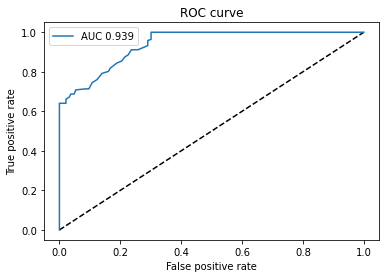

In [71]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='AUC {:.3f}'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

## BertTokenizer

In [103]:
from transformers import BertTokenizer
from torch.utils.data import TensorDataset

In [104]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', 
                                          do_lower_case=True)

In [105]:
tokenizer

PreTrainedTokenizer(name_or_path='bert-base-uncased', vocab_size=30522, model_max_len=512, is_fast=False, padding_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [107]:
train_x = train.drop(['Date'], axis=1)
test_x = test.drop(['Date'], axis=1)

In [108]:
def join_data(x):
    try:
        if 'text' in x.index:
            x.drop(['text'], inplace=True)
        if 'Label' in x.index:
            x.drop(['Label'], inplace=True)
        return ' '.join(['' if pd.isna(i) else i for i in x ])
    except:
        print(x)
        e
train_x['text'] = train_x.apply(join_data, axis=1)
test_x['text'] = test_x.apply(join_data, axis=1)

In [109]:
test_x['Label']

3723    1
3724    0
3725    0
3726    1
3727    1
       ..
4096    0
4097    1
4098    1
4099    1
4100    1
Name: Label, Length: 378, dtype: int64

In [110]:
import torch

In [162]:
encoded_data_train = tokenizer.batch_encode_plus(
    train_x.text.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=128, 
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    test_x.text.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=128, 
    return_tensors='pt'
)


input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(train_x.Label.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(test_x.Label.values)

In [163]:
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

In [164]:
len(dataset_train)


3975

In [165]:
len(dataset_val)


378

In [166]:
input_ids_train[0]

tensor([  101,  1037,  1005, 17666, 21621,  2000,  3136,  1005,  1024, 27059,
         2013,  1996, 15748,  4311,  3556, 11522,  8099,  1005,  7107,  2718,
        20934, 27153,  5132,  2990,  4152,  2010, 17260,  2015,  2006,  2012,
         3256,  1011,  3147,  4074,  8488,  2004, 13955, 28621, 16473,  2039,
         2005,  2142, 22595, 11258,  3653,  3567,  4014,  2004,  9899, 27594,
         2015, 18022,  1005,  1055,  2283,  7501, 18205,  3168,  4138,  8130,
         2015, 29000,  2061,  2898,  1997,  2019,  3733,  4539,  7350,  5333,
         1037,  3221,  2000,  2358, 21531,  2906,  1005,  1055,  2834,  3313,
         2148,  5867,  9326,  1010,  7873,  3477,  1996,  6531,  8691,  2015,
         2192, 23698,  1037, 22446, 10800,  6586,  2283,  2066,  2009,  1005,
         1055,  2639,  4929,  8588,  2031,  2357,  2046, 12559,  2015, 22475,
         3505, 11269,  3231,  2100, 29124,  1005,  1055, 19982,  3372, 21395,
         2099, 12976,  2000,  2718, 16785, 13493,  7245,   102])

In [167]:
attention_masks_train[0]

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1])

In [168]:
print(labels_train[3])
labels_train[0]

tensor(1)


tensor(0)

In [169]:
from transformers import BertForSequenceClassification


In [170]:
label_dict = {'0':0,'1':1}

In [171]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [222]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
batch_size = 4

dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=batch_size)

In [223]:
from transformers import AdamW, get_linear_schedule_with_warmup


In [224]:
optimizer = AdamW(model.parameters(),
                  lr=1e-5, 
                  eps=1e-8)

In [225]:
epochs = 10

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

In [226]:
import numpy as np


In [227]:
from sklearn.metrics import f1_score


In [228]:
def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

In [229]:
def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [239]:
torch.cuda.empty_cache()
import gc
# del variables
gc.collect()

309

In [233]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [234]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = 'cpu'
model.to(device)

print(device)

cuda


In [235]:
def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals

In [236]:
from tqdm.notebook import tqdm

In [237]:
for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
        
    torch.save(model.state_dict(), f'finetuned_BERT_epoch_{epoch}.model')
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/994 [00:00<?, ?it/s]


Epoch 1
Training loss: 0.6961748629988319
Validation loss: 0.6920095838998493
F1 Score (Weighted): 0.45323495827843646


Epoch 2:   0%|          | 0/994 [00:00<?, ?it/s]


Epoch 2
Training loss: 0.6960317072734027
Validation loss: 0.6996623729404651
F1 Score (Weighted): 0.3421888053467001


Epoch 3:   0%|          | 0/994 [00:00<?, ?it/s]


Epoch 3
Training loss: 0.6863969121900363
Validation loss: 0.6407739902797498
F1 Score (Weighted): 0.6035107376283847


Epoch 4:   0%|          | 0/994 [00:00<?, ?it/s]


Epoch 4
Training loss: 0.5822818887155781
Validation loss: 0.4984924586195695
F1 Score (Weighted): 0.7669348928873805


Epoch 5:   0%|          | 0/994 [00:00<?, ?it/s]


Epoch 5
Training loss: 0.42420668632234304
Validation loss: 0.5988056191684384
F1 Score (Weighted): 0.7988403824469398


Epoch 6:   0%|          | 0/994 [00:00<?, ?it/s]


Epoch 6
Training loss: 0.3226003704668244
Validation loss: 0.8390182853933718
F1 Score (Weighted): 0.8227426362197252


Epoch 7:   0%|          | 0/994 [00:00<?, ?it/s]


Epoch 7
Training loss: 0.21635653099921318
Validation loss: 1.0750525702247518
F1 Score (Weighted): 0.8253968253968254


Epoch 8:   0%|          | 0/994 [00:00<?, ?it/s]


Epoch 8
Training loss: 0.13248309149109722
Validation loss: 1.2075060941767572
F1 Score (Weighted): 0.8253479402232099


Epoch 9:   0%|          | 0/994 [00:00<?, ?it/s]


Epoch 9
Training loss: 0.09679155796830696
Validation loss: 1.2319806703597638
F1 Score (Weighted): 0.8333391656110244


Epoch 10:   0%|          | 0/994 [00:00<?, ?it/s]


Epoch 10
Training loss: 0.059907455344841536
Validation loss: 1.2633818488662272
F1 Score (Weighted): 0.8412520663360529


In [244]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)
device = 'cpu'
model.to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [245]:
model.load_state_dict(torch.load('finetuned_BERT_epoch_10.model', map_location=torch.device('cpu')))


<All keys matched successfully>

In [60]:
_, predictions, true_vals = evaluate(dataloader_validation)


In [246]:
_, predictions, true_vals = evaluate(dataloader_validation)

accuracy_per_class(predictions, true_vals)


Class: 0
Accuracy: 160/186

Class: 1
Accuracy: 158/192



In [247]:
_, predictions, true_vals = evaluate(dataloader_train)
accuracy_per_class(predictions, true_vals)


Class: 0
Accuracy: 1876/1879

Class: 1
Accuracy: 2092/2096

